# Loan Prediction Problem

## Introduction

The input dataset contains customer data from a fictional financial company. The Company uses this data to determine if a cusomer's loan application will be approved or not. The data is typical of what we you would see for a finacial organization dealing with customer loan requests and contains customer information. 

## Problem Statement:

The company deals with loan applications from its customers and wants to automate the loan eligibility process (real time) based on the customer details. Build prediction models using different machine learning algorithms to predict if the customer is eligible for loan and whether their loan application will be approved or not. When the customer applies for loan, we get the information about the customer like Gender, Marital Status, Number of Dependents, Education, Employment type,Loan Amount, Loan Term, Credit History, Property Area, etc. 

In [31]:
# The python libraries necessary for our analysis and visualisations are imported and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# The input dataset are loaded.
df_input=pd.read_csv('loan_data.csv')

## Data Exploration

In [4]:
df_input.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df_input.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [105]:
# We make a copy of the original dataset for our data analysis purpose, so that the original dataset remains unchanged if required.
df=df_input.copy()

In [106]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Data Cleaning

We check the input data for cleanliness, and then trim and clean our datasets for analysis in this section.

We get a list of the column names and their data types.

In [107]:
list(df.columns.values)

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [110]:
#check missing values
df.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [111]:
#check missing values
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [112]:
# Replacing the missing values in input dataset
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)
df['Married'].fillna(df['Married'].mode()[0], inplace = True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace = True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace = True)
df['LoanAmount'].fillna(df['LoanAmount'].mode()[0], inplace = True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace = True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace = True)

In [113]:
#check missing values replaced correctly
df.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

## Exploratory Data Analysis

#### We perform EDA using the clean dataset. We look at the different customer information columns and check for any trends in relation to Loan Approval status.

#### Loan_ID:

The first Column is the Loan_ID column. This is a unique identifier for each customer. We can assume that the customer ID information does not impact the loan approval process, and hence this column can be dropped for our analysis purpose.

In [114]:
df = df.drop('Loan_ID', axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#### Gender :

In [115]:
df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

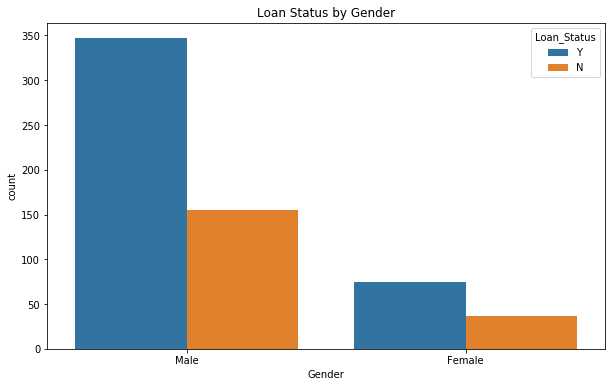

In [116]:
plt.figure(figsize=(10,6))
sns.countplot(x='Gender', hue = 'Loan_Status', data=df);
plt.title("Loan Status by Gender");

#### Marital Status:

In [117]:
df['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

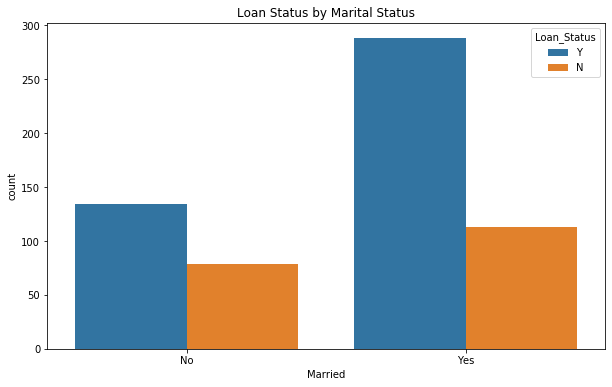

In [118]:
plt.figure(figsize=(10,6))
sns.countplot(x='Married', hue = 'Loan_Status', data=df);
plt.title("Loan Status by Marital Status");

#### Number of dependents:

In [119]:
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

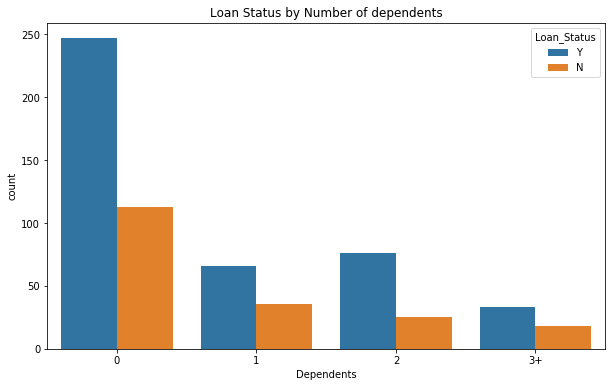

In [120]:
plt.figure(figsize=(10,6))
sns.countplot(x='Dependents', hue = 'Loan_Status', data=df);
plt.title("Loan Status by Number of dependents");

#### Education:

In [121]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

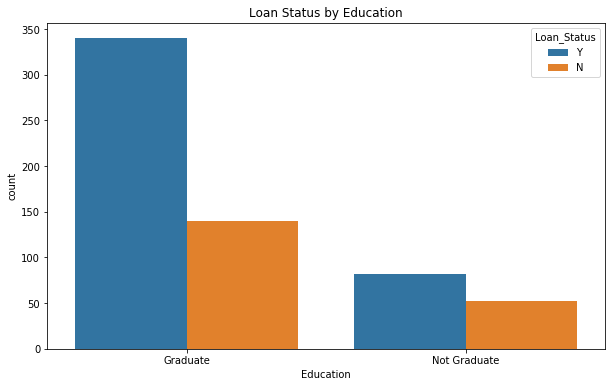

In [122]:
plt.figure(figsize=(10,6))
sns.countplot(x='Education', hue = 'Loan_Status', data=df);
plt.title("Loan Status by Education");

#### Employment Type:

In [123]:
df['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

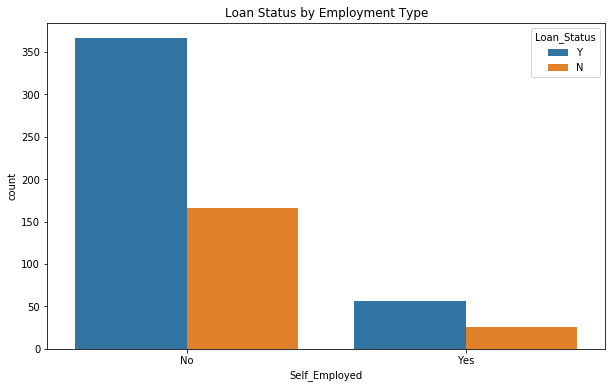

In [124]:
plt.figure(figsize=(10,6))
sns.countplot(x='Self_Employed', hue = 'Loan_Status', data=df);
plt.title("Loan Status by Employment Type");

#### Property Area:

In [125]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

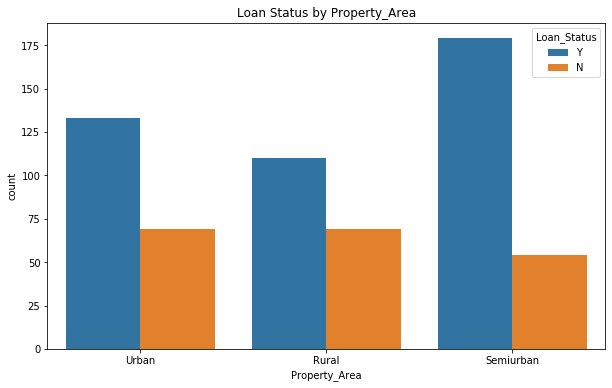

In [126]:
plt.figure(figsize=(10,6))
sns.countplot(x='Property_Area', hue = 'Loan_Status', data=df);
plt.title("Loan Status by Property_Area");

#### Credit History:

In [127]:
df['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

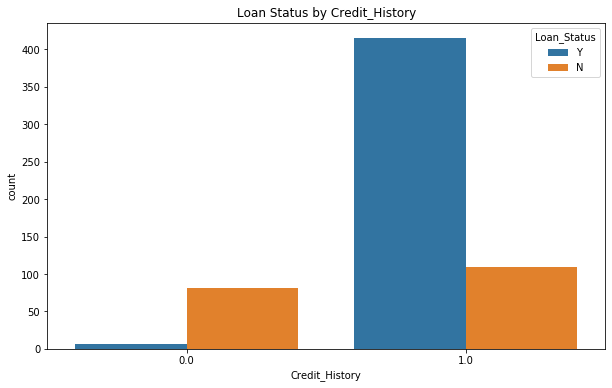

In [128]:
plt.figure(figsize=(10,6))
sns.countplot(x='Credit_History', hue = 'Loan_Status', data=df);
plt.title("Loan Status by Credit_History");

### Distribution Analysis

#### Distribution of applicant income:

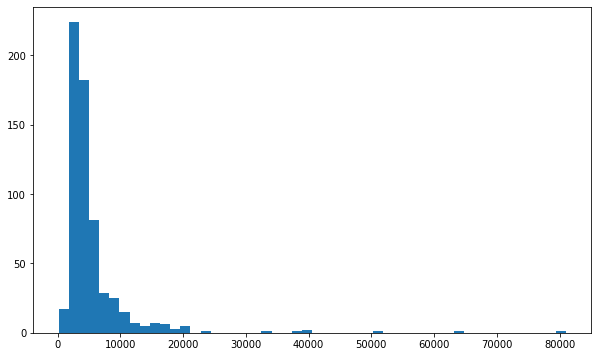

In [129]:
plt.figure(figsize=(10,6)) 
plt.hist(df['ApplicantIncome'],bins=50);

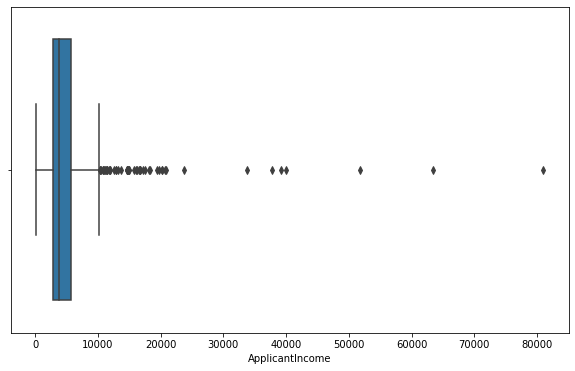

In [130]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['ApplicantIncome']);

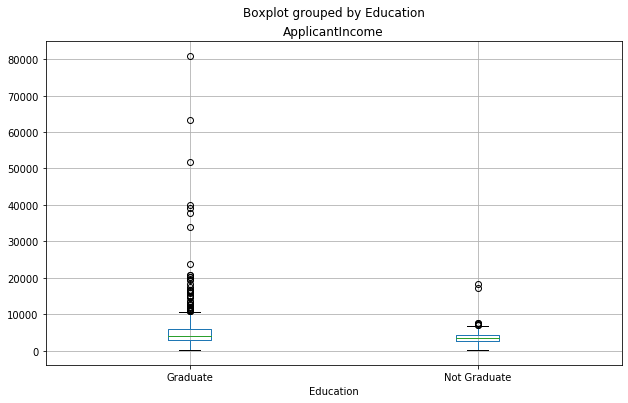

In [131]:
df.boxplot(column = 'ApplicantIncome', by = 'Education',figsize=(10,6))
plt.show()

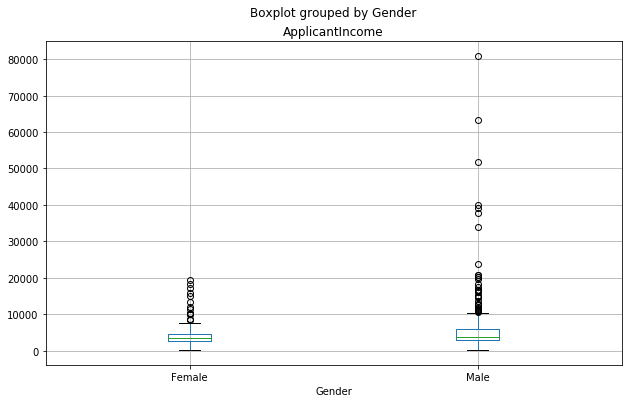

In [132]:
df.boxplot(column = 'ApplicantIncome', by = 'Gender',figsize=(10,6))
plt.show()

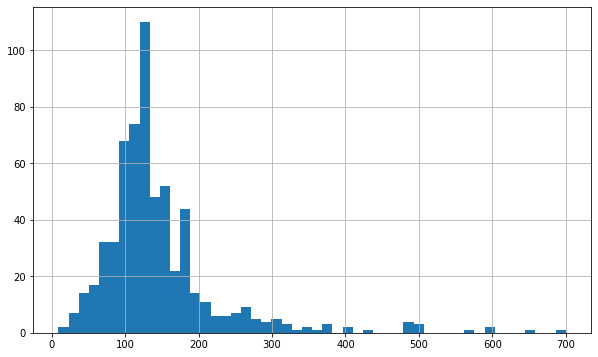

In [133]:
plt.figure(figsize=(10,6)) 
df['LoanAmount'].hist(bins=50)

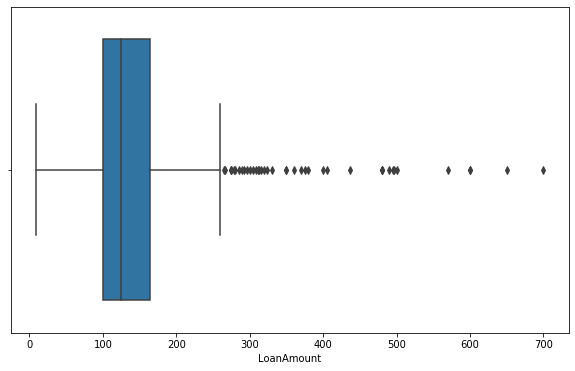

In [134]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['LoanAmount']);

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


**We encode all the data which are categorized to dtype:object using One Hot Encoding.**

In [138]:
from sklearn import preprocessing
df = pd.get_dummies(df,columns=['Gender','Married','Dependents','Education','Self_Employed','Property_Area'])

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 21 columns):
ApplicantIncome            614 non-null int64
CoapplicantIncome          614 non-null float64
LoanAmount                 614 non-null float64
Loan_Amount_Term           614 non-null float64
Credit_History             614 non-null float64
Loan_Status                614 non-null object
Gender_Female              614 non-null uint8
Gender_Male                614 non-null uint8
Married_No                 614 non-null uint8
Married_Yes                614 non-null uint8
Dependents_0               614 non-null uint8
Dependents_1               614 non-null uint8
Dependents_2               614 non-null uint8
Dependents_3+              614 non-null uint8
Education_Graduate         614 non-null uint8
Education_Not Graduate     614 non-null uint8
Self_Employed_No           614 non-null uint8
Self_Employed_Yes          614 non-null uint8
Property_Area_Rural        614 non-null uint8
Property_Are

**Split dataset into x(independent) and y(dependent) variables. Here the Loan_Status is the dependent (target) variable whereas all the others are independent (feature) variables.**

In [140]:
x = df.drop('Loan_Status', axis = 1)
y = df['Loan_Status']

In [141]:
x.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,120.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


In [142]:
y.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [143]:
x.shape

(614, 20)

In [144]:
y.shape

(614,)

**Split dataset into Test and Train sets**

In [147]:
# Split the dataset into training set and test set. We put puts 70% of the data into a training set and 30% of the data into a test set.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [148]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(429, 20)
(429,)
(185, 20)
(185,)


## Modeling

#### Logistic Regression

In [156]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

score_LR = clf.score(x_test, y_test)

print("Accuracy of Logistic Regression:",score_LR)

Accuracy of Logistic Regression: 0.8108108108108109


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Support Vector Machine

In [157]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

score_SVM = clf.score(x_test, y_test)

print("Accuracy of SVM:",score_SVM)

Accuracy of SVM: 0.6810810810810811


C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


#### Decision Tree

In [158]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

y_pred = model.predict(x_test)

score_DT = clf.score(x_test, y_test)

print("Accuracy of Decision Tree:",score_DT)

Accuracy of Decision Tree: 0.6810810810810811


#### Random Forest

In [159]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(x_train, y_train)

y_pred = model.predict(x_test)

score_RF = clf.score(x_test, y_test)

print("Accuracy of Decision Tree:",score_RF)

Accuracy of Decision Tree: 0.7567567567567568


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
